# Statistics - HCI IYKRA

## Import library

In [1]:
import numpy as np
import pandas as pd

## Load data

In [3]:
df = pd.read_excel('data loan.xlsx')

In [4]:
df.head()

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others
3,4,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.088100,102.51,3.98,...,0.0,4.08,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,3.61,Jasa & Perdagangan
4,5,OTHERS,Karyawan,Jawa,12,0 - 30 hari,Tidak,4.607100,102.22,4.50,...,0.0,4.60,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,3.30,Jasa & Perdagangan


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

In [11]:
numerical_data = df.select_dtypes(include = [np.number]).columns
categorical_data = df.select_dtypes(exclude = [np.number]).columns

In [12]:
numerical_data

Index(['Kontrak', 'Tenor', 'Total_AR', 'LTV', 'OTR', 'Age', 'Interest_Rate',
       'Income', 'DP', 'AF', 'Inflasi'],
      dtype='object')

In [13]:
categorical_data

Index(['Tipe_Kendaraan', 'Pekerjaan', 'Area', 'Bucket_Collectability', 'NPF',
       'Tujuan', 'Pendidikan', 'Tanggungan', 'Status', 'Gender', 'Paket',
       'Segmen'],
      dtype='object')

In [22]:
df[categorical_data].head()

,Tipe_Kendaraan,Pekerjaan,Area,Bucket_Collectability,NPF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Segmen
0,OTHERS,Karyawan,Jawa,>90 - 120 hari,Ya,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,Jasa & Perdagangan
1,OTHERS,Wiraswasta,Jawa,0 - 30 hari,Tidak,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,Others
2,OTHERS,Wiraswasta,Jawa,0 - 30 hari,Tidak,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,Others
3,OTHERS,Karyawan,Jawa,0 - 30 hari,Tidak,Private,Sarjana,Ada,OTHERS,Laki-laki,Ya,Jasa & Perdagangan
4,OTHERS,Karyawan,Jawa,0 - 30 hari,Tidak,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,Jasa & Perdagangan


In [26]:
df[numerical_data].head()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
0,1,12,2.763126,100.00,2.76,33,0.39,10,0.0,2.76,3.58
1,2,12,2.805000,103.70,2.71,30,0.00,15,0.0,2.81,3.58
2,3,12,3.104000,103.33,3.00,47,0.22,20,0.0,3.10,4.17
3,4,12,4.088100,102.51,3.98,59,0.25,15,0.0,4.08,3.61
4,5,12,4.607100,102.22,4.50,39,0.22,20,0.0,4.60,3.30


## Transformasi Tipe_Kendaraan: Recording

In [14]:
df['Tipe_Kendaraan'].value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

In [15]:
import copy

In [16]:
df_edit = copy.deepcopy(df)

In [19]:
df_edit['Tipe_Kendaraan'] = df_edit.Tipe_Kendaraan.map({'MINIBUS':'MINIBUS',
                                                      'LCGC':'NON-MINIBUS',
                                                      'OTHERS':'NON-MINIBUS',
                                                       'TRUCK & PICK UP':'NON-MINIBUS'})

In [20]:
df_edit['Tipe_Kendaraan'].value_counts()

MINIBUS        14440
NON-MINIBUS    13853
Name: Tipe_Kendaraan, dtype: int64

In [21]:
df['Tipe_Kendaraan'].value_counts().index

Index(['MINIBUS', 'LCGC', 'OTHERS', 'TRUCK & PICK UP'], dtype='object')

## Transformasi Area: Dummy

In [27]:
df_edit['Area'].value_counts()

Jawa        15677
Sumatera     9872
Others       2744
Name: Area, dtype: int64

In [28]:
D_Area = pd.get_dummies(df_edit['Area'], prefix = 'Area')

In [30]:
D_Area.head(3)

,Area_Jawa,Area_Others,Area_Sumatera
0,1,0,0
1,1,0,0
2,1,0,0


In [31]:
D_Area_Jawa = D_Area.drop(columns='Area_Jawa')

In [32]:
D_Area_Jawa.head(3)

,Area_Others,Area_Sumatera
0,0,0
1,0,0
2,0,0


In [34]:
df_edit = pd.concat([df_edit, D_Area_Jawa], axis = 1)

In [35]:
df_edit.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Area_Others,Area_Sumatera
0,1,NON-MINIBUS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan,0,0
1,2,NON-MINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others,0,0
2,3,NON-MINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others,0,0


## Sisipan: Mengubah nilai dengan fungsi numpy.where()

In [36]:
np.where(df_edit['Area']=='Jawa', 'Jawa', 'Luar Jawa')

array(['Jawa', 'Jawa', 'Jawa', ..., 'Luar Jawa', 'Luar Jawa', 'Jawa'],
      dtype='<U9')

## Diskretisasi LTV

In [40]:
discrete_LTV = pd.cut(df_edit.LTV, 7)

In [41]:
discrete_LTV.head()

0    (96.584, 111.83]
1    (96.584, 111.83]
2    (96.584, 111.83]
3    (96.584, 111.83]
4    (96.584, 111.83]
Name: LTV, dtype: category
Categories (7, interval[float64]): [(5.003, 20.356] < (20.356, 35.601] < (35.601, 50.847] < (50.847, 66.093] < (66.093, 81.339] < (81.339, 96.584] < (96.584, 111.83]]

## Transformasi Income: Standarisasi 

In [43]:
df_edit.describe()['Income']

count    28293.000000
mean        20.449334
std        115.608090
min          1.000000
25%          9.000000
50%         15.000000
75%         20.000000
max      10000.000000
Name: Income, dtype: float64

In [46]:
standardized_income = (df_edit['Income'] - df_edit['Income'].mean()) / df_edit['Income'].std()

In [47]:
standardized_income.head()

0   -0.090386
1   -0.047136
2   -0.003887
3   -0.047136
4   -0.003887
Name: Income, dtype: float64

In [48]:
df.Income.head()

0    10
1    15
2    20
3    15
4    20
Name: Income, dtype: int64

In [63]:
standardized_income.describe()

count    2.829300e+04
mean    -1.084246e-16
std      1.000000e+00
min     -1.682351e-01
25%     -9.903575e-02
50%     -4.713627e-02
75%     -3.886698e-03
max      8.632225e+01
Name: Income, dtype: float64

In [49]:
standardized_income.std()

0.9999999999999594

In [50]:
df.Income.std()

115.60808970422566

In [51]:
from matplotlib import pyplot as plt

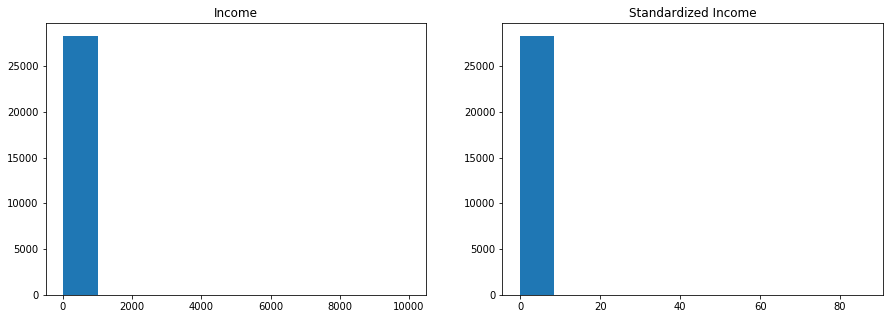

In [54]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(standardized_income)
ax2.set_title('Standardized Income')

plt.show()

In [55]:
ln_income = np.log(df_edit.Income)
ln_income.head()

0    2.302585
1    2.708050
2    2.995732
3    2.708050
4    2.995732
Name: Income, dtype: float64

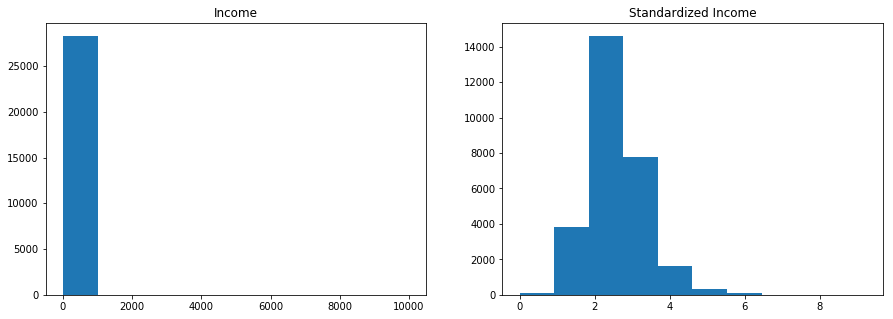

In [58]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(ln_income)
ax2.set_title('Standardized Income')

plt.show()

## Normalisasi Income

In [60]:
normalized_income = (df_edit['Income'] - df_edit['Income'].min()) / (df_edit['Income'].max() - df_edit['Income'].min())
normalized_income.head()

0    0.0009
1    0.0014
2    0.0019
3    0.0014
4    0.0019
Name: Income, dtype: float64

In [61]:
normalized_income.describe()

count    28293.000000
mean         0.001945
std          0.011562
min          0.000000
25%          0.000800
50%          0.001400
75%          0.001900
max          1.000000
Name: Income, dtype: float64

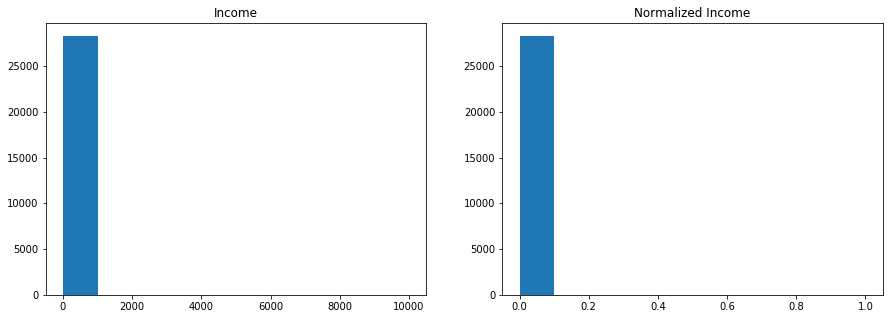

In [62]:
#visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15,5))

ax1.hist(df_edit['Income'])
ax1.set_title('Income')

ax2.hist(normalized_income)
ax2.set_title('Normalized Income')

plt.show()

## Mendeteksi Outliers

**Z Score**

In [65]:
z_income = copy.deepcopy(standardized_income)

In [66]:
df_edit[['Kontrak', 'Income']][np.abs(z_income) > 3]

,Kontrak,Income
4559,4560,1500
4611,4612,1000
4898,4899,500
4899,4900,500
4943,4944,500
4944,4945,500
4945,4946,500
5073,5074,10000
7457,7458,430
8291,8292,700


In [69]:
import scipy.stats as sct
sct.iqr(df.Income)

11.0

In [72]:
q1_income = df_edit['Income'].quantile(0.25)
q3_income = df_edit['Income'].quantile(0.75)
iqr_income = q3_income - q1_income
print(iqr_income)

11.0


In [76]:
df_edit[['Kontrak', 'Income']][(df_edit.Income < (q1_income - 1.5 * iqr_income)) |
                              (df_edit.Income > (q3_income + 1.5 * iqr_income))]

,Kontrak,Income
86,87,50
126,127,100
127,128,60
187,188,50
204,205,40
208,209,50
210,211,50
247,248,50
261,262,50
313,314,60


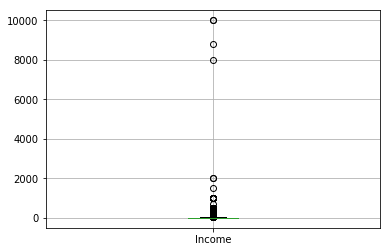

In [77]:
df_edit.boxplot(column='Income')

## Hypothesis Testing

In [78]:
from scipy.stats import ttest_ind

In [79]:
x1 = df_edit['Income'][df_edit['NPF'] == 'Ya']
x2 = df_edit['Income'][df_edit['NPF'] != 'Ya']

In [80]:
ttest_ind(x1, x2, equal_var = True) # assuming equal variances

Ttest_indResult(statistic=1.1605323548958912, pvalue=0.2458419213508887)

**Interpretasi** <br>
Karena p-value > 0.05 maka H0 gagal ditolak, sehingga dapat disimpulkan bahwa rata-rata income kelompok NPF dan tidak NPF tidak berbeda secara signifikan.

In [81]:
print('standard deviations of x1 = %.3f and x2 = %.3f' %(x1.std(), x2.std()))

standard deviations of x1 = 160.307 and x2 = 37.691


Karena deviasi standar x1 dua kali lebih besar daripada x2 maka kita tidak bisa mengasumsikan variance sama, sehingga perlu diasumsikan variance antara income NPF dan tidak NPF berbeda.

In [82]:
ttest_ind(x1, x2, equal_var = False) #assuming different variances

Ttest_indResult(statistic=1.1440147059898442, pvalue=0.25263531221651053)

Meskipun kesimpulan yang dihasilkan sama, tetapi asumsi yang digunakan pada pengujian kedua lebih tepat. 

## Regresi linear sederhana

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [85]:
# input dataset
x = df_edit['Income']
y = df_edit['Total_AR']

In [86]:
# change data structure
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)

In [87]:
regressor = LinearRegression()
regressor.fit(x,y) # training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
# regression equation
print('y = %.3f + %.3f X' %(regressor.intercept_, regressor.coef_))

y = 213.955 + 0.040 X


In [91]:
# regression equation
y_pred = regressor.predict(x)
print('R2 = %.3f' %metrics.r2_score(y, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
print('RMSE = %.3f' %rmse)

R2 = 0.003
RMSE = 88.263


## Pemodelan dengan statsmodels

In [92]:
mc = pd.read_excel(r'data microchip.xlsx')

In [94]:
import statsmodels.formula.api as smf

**Regresi pengaruh waktu terhadap jumlah komponen**

In [98]:
ols_df_edit = smf.ols('Total_AR ~ Income', data=df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     78.35
Date:                Fri, 25 Oct 2019   Prob (F-statistic):           9.10e-19
Time:                        16:24:28   Log-Likelihood:            -1.6691e+05
No. Observations:               28293   AIC:                         3.338e+05
Df Residuals:                   28291   BIC:                         3.338e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    213.9555      0.533    401.495      0.0

In [96]:
ols_1_mc = smf.ols('number_of_component ~ year_since_1959', data=mc).fit()

In [99]:
print(ols_1_mc.summary())

                             OLS Regression Results                            
Dep. Variable:     number_of_component   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     7.688
Date:                 Fri, 25 Oct 2019   Prob (F-statistic):             0.0694
Time:                         16:25:26   Log-Likelihood:                -19.423
No. Observations:                    5   AIC:                             42.85
Df Residuals:                        3   BIC:                             42.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9434     1

D:\Anaconda\lib\site-packages\statsmodels\stats\stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


### rmse from statsmodels

In [100]:
from statsmodels.tools.eval_measures import rmse

In [101]:
rmse(mc.number_of_component, ols_1_mc.predict(mc.year_since_1959))

11.770445880527003

In [102]:
rmse(df_edit.Total_AR, ols_df_edit.predict(df_edit.Income))

88.26273035970209

In [103]:
ols_df_edit = smf.ols('Total_AR ~ Income + OTR + DP', data=df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 7.294e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        16:31:50   Log-Likelihood:            -1.3629e+05
No. Observations:               28293   AIC:                         2.726e+05
Df Residuals:                   28289   BIC:                         2.726e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5643      0.494     53.800      0.0